In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Load the dataset
data = pd.read_csv('Time-Series Analysis Dataset.csv')

In [3]:
# Convert 'Date' to datetime and set it as the index
data['datetime_local'] = pd.to_datetime(data['datetime_local'])
data.set_index('datetime_local', inplace=True)


In [4]:
# Drop rows with missing values in 'USD'
data.dropna(subset=['temperature'], inplace=True)


In [5]:
# ---------- USD Analysis ----------
# Regular differencing
data['usd_diff'] = data['temperature'].diff()

In [22]:
# Seasonal decomposition of original USD
result_usd = seasonal_decompose(data['temperature'], model='additive', period=12)
data['usd_sea_diff'] = result_usd.resid

In [23]:
# Log transformation
data['usd_log'] = np.log(data['temperature'])

In [24]:
# Log transformation + regular differencing
data['usd_log_diff'] = data['usd_log'].diff().dropna()

In [25]:
# Seasonal decomposition after log differencing
if len(data['usd_log_diff'].dropna()) >= 12:  # Check if enough data exists for decomposition
    result_usd_log = seasonal_decompose(data['usd_log_diff'].dropna(), model='additive', period=12)
    data['usd_log_seasonal_diff'] = result_usd_log.resid
else:
    data['usd_log_seasonal_diff'] = np.nan
    print("Not enough data for seasonal decomposition after log differencing for USD.")

In [26]:
# Plotting results
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Original TEMP Data')

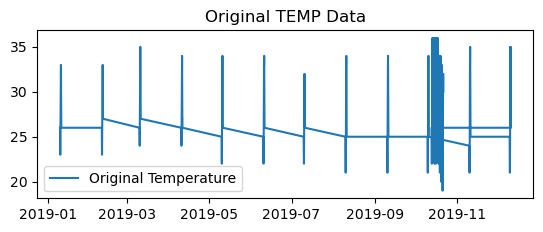

In [27]:
plt.subplot(2, 1, 1)
plt.plot(data['temperature'], label='Original Temperature')
plt.legend(loc='best')
plt.title('Original TEMP Data')

Text(0.5, 1.0, 'TEMP Regular Differencing')

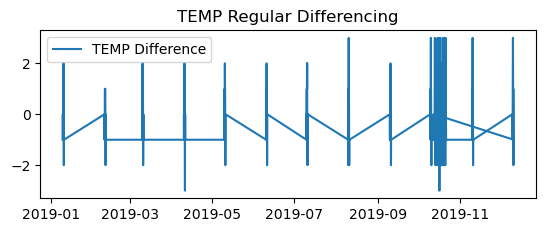

In [28]:
plt.subplot(2, 1, 1)
plt.plot(data['usd_diff'], label='TEMP Difference')
plt.legend(loc='best')
plt.title('TEMP Regular Differencing')

Text(0.5, 1.0, 'TEMP Seasonal Adjustment')

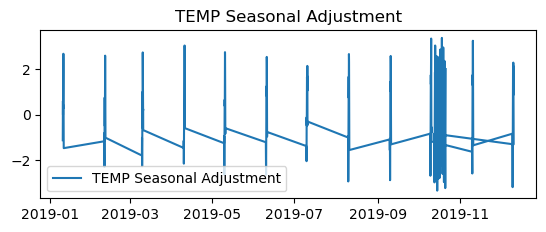

In [31]:
plt.subplot(2, 1, 1)
plt.plot(data['usd_sea_diff'], label='TEMP Seasonal Adjustment')
plt.legend(loc='best')
plt.title('TEMP Seasonal Adjustment')

Text(0.5, 1.0, 'Log Transformation of TEMP')

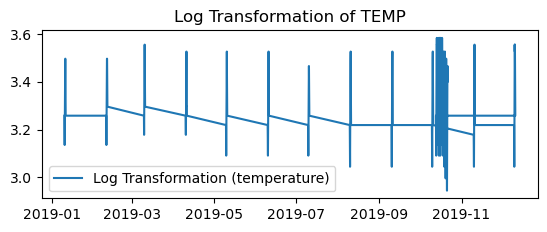

In [33]:
plt.subplot(2, 1, 1)
plt.plot(data['usd_log'], label='Log Transformation (temperature)')
plt.legend(loc='best')
plt.title('Log Transformation of TEMP')

Text(0.5, 1.0, 'Log Transformation and Differencing (TEMP)')

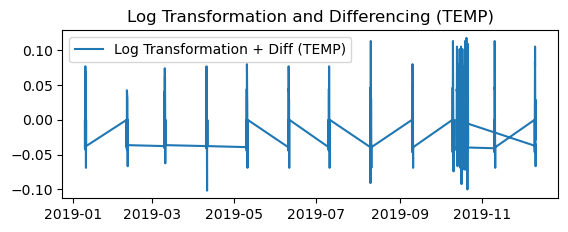

In [35]:
plt.subplot(2, 1, 1)
plt.plot(data['usd_log_diff'], label='Log Transformation + Diff (TEMP)')
plt.legend(loc='best')
plt.title('Log Transformation and Differencing (TEMP)')

Text(0.5, 1.0, 'Log, Differencing, and Seasonal Adjustment (TEMP)')

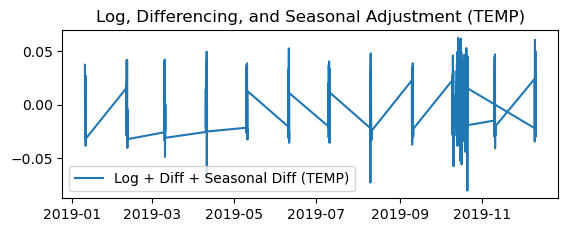

In [37]:
plt.subplot(2, 1, 1)
plt.plot(data['usd_log_seasonal_diff'], label='Log + Diff + Seasonal Diff (TEMP)')
plt.legend(loc='best')
plt.title('Log, Differencing, and Seasonal Adjustment (TEMP)')